In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# FILES
mlp_stats = np.load("./results/v1/stats.npy")
cnne_stats = np.load("./results/v4/stats_2.npy")
cnne_stats_inputs = np.load("./results/v4/stats_inputs_2.npy")


# print(mlp_stats.shape, cnne_stats.shape, cnne_stats_inputs.shape)

In [4]:
# Labels and print functions
mlp_label = ["P2_X", "P2_Y", "P1_O1","P1_O2","P1_Onion","P1_Dish", "P1_Soup", "P2_O1","P2_O2","P2_Onion","P2_Dish", "P2_Soup","TP_X","TP_Y","TO_X","TO_Y","TD_X","TD_Y","TS_X","TS_Y"]
cnne_ch_label = ["Map","Bench","Pot","Onion Box","Dish Box","Serve","Pot Onions","Pot Tick","Onion(s)","Dish(es)", "Soup(s)","P1 O1","P1 O2","P1 O3","P1 O4"]#,"P2 O1","P2 O2","P2 O3","P2 O4"]
tile_label = ["Bench","Pot","Onion","Dish","Serve","P1","P2","Empty"]
def print_lists(orders,labels,col_names):
    #HEADER
    header=f"    "
    for name in col_names:
        header += f"{name:<15}"
    print(header)

    L = len(orders[0])
    for i in range(L):
        row=f"{i+1:<4}"
        for order in orders:
            row+= f"{labels[order[i]]:<15}"
        
        print(row)

In [5]:
#Schluze ranking method
def schluze(stats):
    W  = len(stats[0])
    d_grid = np.zeros([W,W])
    for row in stats:
        for i in range(W):
            if i<W:
                for j in range(i+1,W):
                    item1 = row[i]
                    item2 = row[j]
                    # print(item1,item2)
                    if item1>item2:
                        d_grid[i,j]+=1
                    elif item2>item1:
                        d_grid[j,i]+=1
                    else:
                        print("idk")
                        d_grid[i,j]+=1
    # print(d_grid)

    p_grid = np.zeros([W,W])
    for i in range(W):
        for j in range(W):
            if i!=j:
                if d_grid[i,j] > d_grid[j,i]:
                    p_grid[i,j] = d_grid[i,j]
                else:
                    p_grid[i,j]=0

    for i in range(W):
        for j in range(W):
            if i!=j:
                for k in range(W):
                    if i!=k and j!=k:
                        p_grid[j,k] = max(p_grid[j,k],min(p_grid[j,i],p_grid[i,k]))
    

    # print(p_grid)

    w_grid = np.zeros([W,W])
    for i in range(W):
        if i<W:
            for j in range(i+1,W):
                item1 = p_grid[i,j]
                item2 = p_grid[j,i]

                # print(item1,item2)
                if item1>item2:
                    w_grid[i,j]=1
                elif item2>item1:
                    w_grid[j,i]=1
                else:
                    print("idk2")
    # print(w_grid)

    w_sum = np.sum(w_grid,axis=0)
    return w_sum


In [6]:
# MLP Rank addition combination
mlp_rank_sum = np.zeros(mlp_stats.shape[1])
for row in mlp_stats:
    # row = np.round(row,2)
    row_ranks = row.argsort().argsort()
    mlp_rank_sum += row_ranks
mlp_rank_order = (-mlp_rank_sum).argsort()

# MLP Rank mean combination
mlp_grad_sum = np.linalg.norm(mlp_stats,axis=1)
mlp_grad_norm = mlp_stats / mlp_grad_sum[:, np.newaxis]

mlp_grad_mean = np.mean(mlp_grad_norm,axis=0)
mlp_mean_order = (-mlp_grad_mean).argsort()

# MLP Rank schluze combination
mlp_schluze_rank = schluze(mlp_stats)
mlp_schluze_order = mlp_schluze_rank.argsort()

# Print orders
col_names = ["AddSort","Mean","Schluze"]

print_lists([mlp_rank_order, mlp_mean_order, mlp_schluze_order],mlp_label,col_names)

    AddSort        Mean           Schluze        
1   P1_Soup        P1_Soup        P1_Soup        
2   P1_O1          P1_O1          P1_O1          
3   P1_O2          P1_O2          P1_O2          
4   TP_Y           TP_X           TP_Y           
5   TP_X           TP_Y           TP_X           
6   TS_Y           TS_Y           TS_Y           
7   TO_X           TO_Y           TO_X           
8   TD_Y           TO_X           TO_Y           
9   TO_Y           TD_Y           TD_Y           
10  P2_O2          P2_O2          P2_O2          
11  TD_X           TS_X           TD_X           
12  TS_X           TD_X           P2_O1          
13  P2_O1          P2_O1          TS_X           
14  P2_X           P2_X           P2_X           
15  P2_Y           P2_Y           P2_Y           
16  P2_Onion       P2_Onion       P2_Onion       
17  P1_Dish        P1_Dish        P1_Dish        
18  P2_Dish        P2_Dish        P2_Dish        
19  P1_Onion       P1_Onion       P1_Onion       


In [20]:
# CNNe Rank schluze combination
# Channel Analysis

cnne_flat_stats = cnne_stats.reshape(cnne_stats.shape[0],cnne_stats.shape[1],cnne_stats.shape[2]*cnne_stats.shape[3])

cnne_stats_ch_max = np.max(cnne_flat_stats,axis=2)
cnne_stats_ch_std = np.std(cnne_flat_stats,axis=2)
# print(cnne_flat_stats.shape, cnne_stats_ch_max.shape, cnne_stats_ch_std.shape)

cnne_schluze_max_rank = schluze(cnne_stats_ch_max)
cnne_schluze_max_order = cnne_schluze_max_rank.argsort()

cnne_schluze_std_rank = schluze(cnne_stats_ch_std)
cnne_schluze_std_order = cnne_schluze_std_rank.argsort()

# Print orders
col_names = ["Schluze Max","Schluze Std"]

print_lists([cnne_schluze_max_order, cnne_schluze_std_order],cnne_ch_label,col_names)

    Schluze Max    Schluze Std    
1   P1 O1          Pot Tick       
2   P1 O3          P1 O1          
3   P1 O4          P1 O3          
4   Pot Tick       P1 O4          
5   P1 O2          P1 O2          
6   Dish(es)       Dish(es)       
7   Onion(s)       Onion(s)       
8   Soup(s)        Soup(s)        
9   Pot Onions     Pot Onions     
10  Serve          Serve          
11  Dish Box       Dish Box       
12  Onion Box      Onion Box      
13  Pot            Pot            
14  Bench          Bench          
15  Map            Map            


In Map (%): 99.68
Most Salient Location Stats
P1 held (Onion/Dish/Soup): 31.1% / 10.4% / 11.6%
P2 held (Onion/Dish/Soup): 30.6% /  9.9% /  7.4%
Bench   (Onion/Dish/Soup):  7.3% /  1.0% /  0.0%

All frames stats
P1 held (Onion/Dish/Soup): 30.9% / 12.4% /  9.5%
P2 held (Onion/Dish/Soup): 28.0% / 10.3% /  7.3%
Bench   (Onion/Dish/Soup): 28.1% /  9.3% /  0.5%


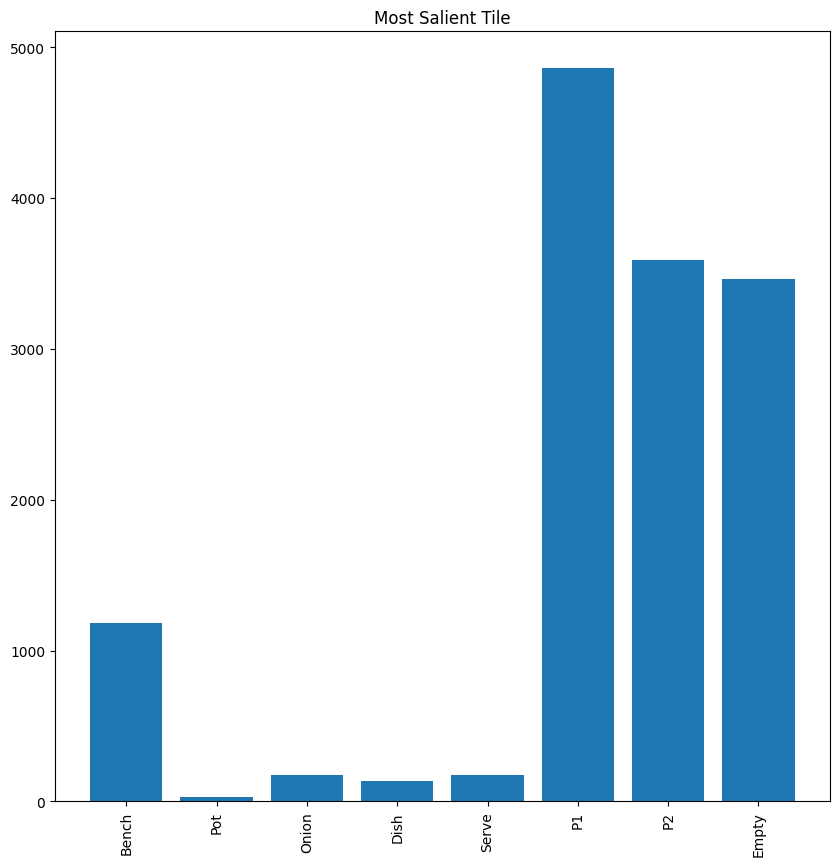

In [21]:
# CNNe Position Analysis

# Input Positional Data
# 0 - Map exists 0/1
# 1 - Bench (X) 0/1
# 2 - Pot 0/1
# 3 - Onion Source 0/1
# 4 - Dish Source 0/1
# 5 - Serving 0/1
# 6 - Pot onions 0-3
# 7 - Pot tick 0-20
# 8 - Placed onions 0/1 incl. player held
# 9 - Placed dishes 0/1 incl. player held
# 10 - placed soups 0/1 incl. player held
# 11 - P1 O1 -1/0/1
# 12 - P1 O2 -1/0/1
# 13 - P2 O1 -1/0/1
# 14 - P2 O2 -1/0/1

# Item Sum
# 0 - Map exists 0/1
# 1 - Bench (X) 0/1
# 2 - Pot 0/1
# 3 - Onion Source 0/1
# 4 - Dish Source 0/1
# 5 - Serving 0/1
# 6 - Player 1
# 7 - Player 2
# 8 - None/Empty space

# Subitem Sum
# 0 - P1 Held
# 1 - P2 Held
# 2 - Bench Item

cnne_flat_stats_inputs = cnne_stats_inputs.reshape(cnne_stats_inputs.shape[0],cnne_stats_inputs.shape[1],cnne_stats_inputs.shape[2]*cnne_stats_inputs.shape[3])
cnne_flat_max = np.max(cnne_flat_stats,axis=1)
cnne_flat_max_argmax = np.argmax(cnne_flat_max,axis=1)
# print(cnne_flat_max.shape, cnne_flat_max_argmax.shape)

cnne_item_sum = np.zeros(9)
cnne_subitem_sum = np.zeros([3,3])
cnne_subitem_allsum = np.zeros([3,3])

N = cnne_flat_max.shape[0]
for i in range(N):
    square_idx = cnne_flat_max_argmax[i]
    cnne_input = np.round(cnne_flat_stats_inputs[i])
    
    #allsum
    for sub_ch in [8,9,10]:
        cnne_input_bool = np.bool_(cnne_input)
        p1sum = np.sum(np.bitwise_and(np.bitwise_or(cnne_input_bool[11,:],cnne_input_bool[12,:]), cnne_input_bool[sub_ch,:]))       
        p2sum = np.sum(np.bitwise_and(np.bitwise_or(cnne_input_bool[13,:],cnne_input_bool[14,:]), cnne_input_bool[sub_ch,:]))
        benchsum = np.sum(np.bitwise_and(cnne_input_bool[1], cnne_input_bool[sub_ch]))

        if p1sum !=0:
            cnne_subitem_allsum[0,sub_ch-8]+=1
        if p2sum !=0:
            cnne_subitem_allsum[1,sub_ch-8]+=1
        if benchsum !=0:
            cnne_subitem_allsum[2,sub_ch-8]+=1

    #allsum end

    found = False
    item = cnne_input[0,square_idx]
    if item != 0:
        cnne_item_sum[0] +=1
    else:
        continue #ignore out of bounds tiles

    for ch in range(1,6):
        item = cnne_input[ch,square_idx]
        # print(item)
        if item != 0:
            cnne_item_sum[ch] +=1
            found = True

            if ch == 1:
                for sub_ch in [8,9,10]:
                    subitem = cnne_input[sub_ch,square_idx]
                    if subitem !=0:
                        cnne_subitem_sum[2,sub_ch-8]+=1
                        break
            break
    
    if found == False:
        for players in [0,1]:
            item1 = cnne_input[11+players*2,square_idx]
            item2 = cnne_input[12+players*2,square_idx]

            if item1 !=0 or item2 !=0:
                cnne_item_sum[6+players]+=1
                found = True

                for sub_ch in [8,9,10]:
                    subitem = cnne_input[sub_ch,square_idx]
                    if subitem !=0:
                        cnne_subitem_sum[players,sub_ch-8]+=1
                        break
                break
    
    if found == False:
        cnne_item_sum[8] +=1

# print(cnne_item_sum)
print("In Map (%):", round(cnne_item_sum[0]/N*100,2))
cnne_subitem_sum[0,:]/=cnne_item_sum[6]
cnne_subitem_sum[1,:]/=cnne_item_sum[7]
cnne_subitem_sum[2,:]/=cnne_item_sum[1]
cnne_subitem_sum = np.round(cnne_subitem_sum*100,1)
print("Most Salient Location Stats")
print(f"P1 held (Onion/Dish/Soup): {cnne_subitem_sum[0,0]:>4}% / {cnne_subitem_sum[0,1]:>4}% / {cnne_subitem_sum[0,2]:>4}%")
print(f"P2 held (Onion/Dish/Soup): {cnne_subitem_sum[1,0]:>4}% / {cnne_subitem_sum[1,1]:>4}% / {cnne_subitem_sum[1,2]:>4}%")
print(f"Bench   (Onion/Dish/Soup): {cnne_subitem_sum[2,0]:>4}% / {cnne_subitem_sum[2,1]:>4}% / {cnne_subitem_sum[2,2]:>4}%")

cnne_subitem_allsum/=N
cnne_subitem_allsum = np.round(cnne_subitem_allsum*100,1)

print("\nAll frames stats")
print(f"P1 held (Onion/Dish/Soup): {cnne_subitem_allsum[0,0]:>4}% / {cnne_subitem_allsum[0,1]:>4}% / {cnne_subitem_allsum[0,2]:>4}%")
print(f"P2 held (Onion/Dish/Soup): {cnne_subitem_allsum[1,0]:>4}% / {cnne_subitem_allsum[1,1]:>4}% / {cnne_subitem_allsum[1,2]:>4}%")
print(f"Bench   (Onion/Dish/Soup): {cnne_subitem_allsum[2,0]:>4}% / {cnne_subitem_allsum[2,1]:>4}% / {cnne_subitem_allsum[2,2]:>4}%")

# Plot
plt.bar(range(8),cnne_item_sum[1:])
plt.title("Most Salient Tile")
plt.xticks(ticks = range(0,8),labels=["Bench","Pot","Onion","Dish","Serve","P1","P2","Empty"],rotation="vertical");


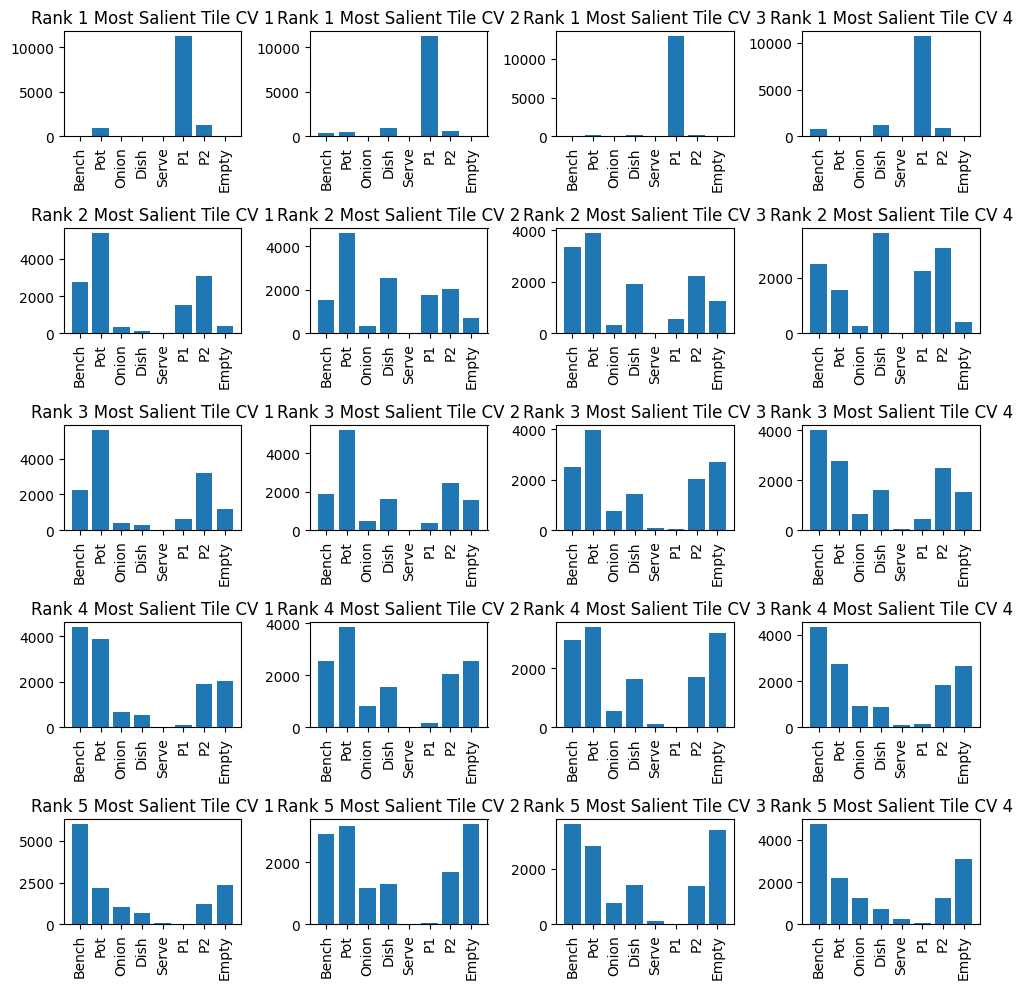

In [7]:
#CNN2
#square stats (1) generated and processed in Predictor_2_CNN2.ipynb to reduce memory requirements.
#each row contains the number of predictions of a tile across the test set.
#each row represents the rank position of the gradient value. Where row 0 is the highest gradient, row 1 is the second highest gradient...

# Square Stats
# 0 - Bench (X) 0/1
# 1 - Pot 0/1
# 2 - Onion Source 0/1
# 3 - Dish Source 0/1
# 4 - Serving 0/1
# 5 - Player 1
# 6 - Player 2
# 7 - None/Empty space

#Generated from other file
crossval_idx_list=[1,2,3,4]
for crossval_idx in crossval_idx_list:
    cnn2_square_stats = np.load(f"./results/v2_{crossval_idx}/square_stats.npy")
    # Plot
    num=5
    plt.rcParams["figure.figsize"] = (10, 10)
    for i in range(num):
        plt.subplot(num,len(crossval_idx_list),i*len(crossval_idx_list)+crossval_idx)
        plt.bar(range(8),cnn2_square_stats[i])
        plt.title(f"Rank {i+1} Most Salient Tile CV {crossval_idx}")
        plt.xticks(ticks = range(8),labels=tile_label,rotation="vertical");
        plt.tight_layout();

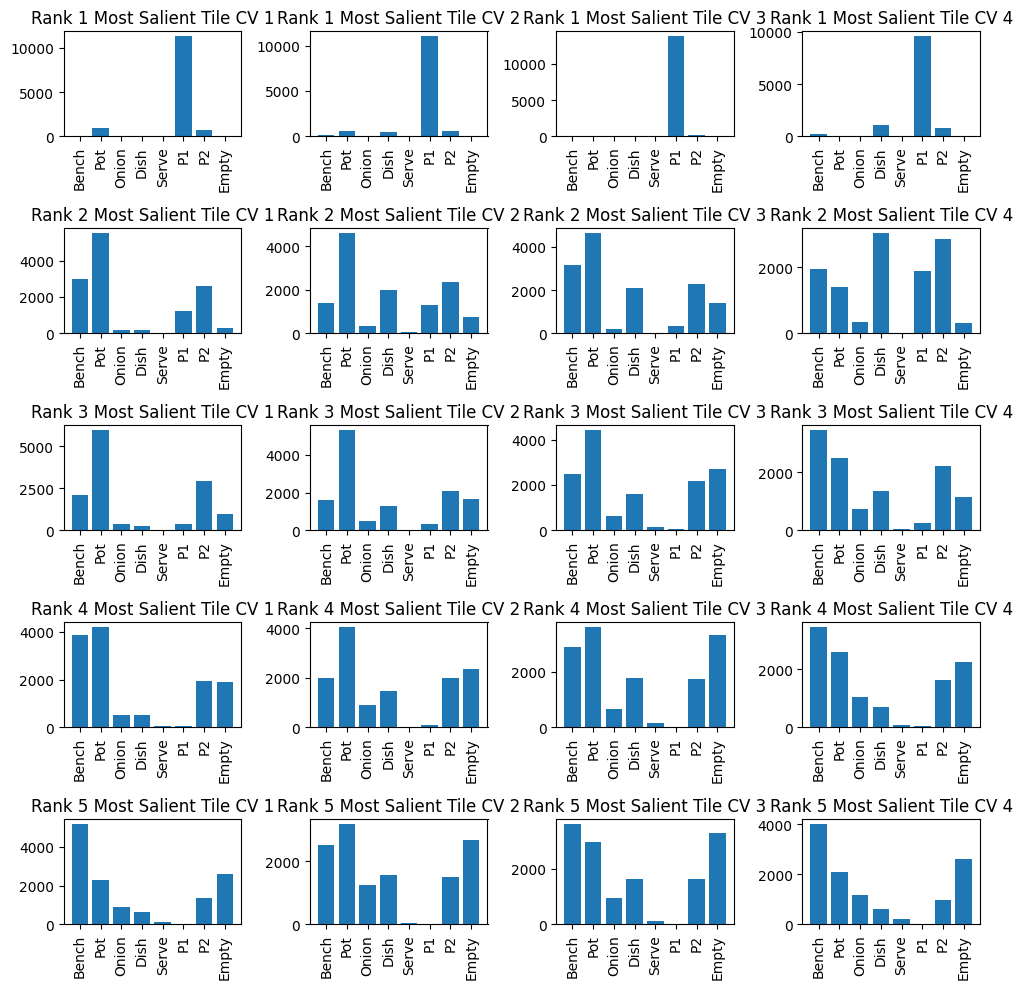

In [8]:
#Rank graphs w/ duplicates
crossval_idx_list=[1,2,3,4]
for crossval_idx in crossval_idx_list:
    cnn2_square_stats = np.load(f"./results/v2_{crossval_idx}/square_stats_val.npy")
    # Plot
    num=5
    plt.rcParams["figure.figsize"] = (10, 10)
    for i in range(num):
        plt.subplot(num,len(crossval_idx_list),i*len(crossval_idx_list)+crossval_idx)
        plt.bar(range(8),cnn2_square_stats[i])
        plt.title(f"Rank {i+1} Most Salient Tile CV {crossval_idx}")
        plt.xticks(ticks = range(8),labels=tile_label,rotation="vertical");
        plt.tight_layout();

In [9]:
# CNN2 Schluze Stats
#Stats generated in respective file to reduce memory requirements
# Each row has a sequency of characters representing tiles in order of saliency (highest to lowest)
# Used max across colour channels and downsampled to grid size.

crossval_idx_list=[1,2,3,4]
cnn2_schluze_max_order_list=[]
for crossval_idx in crossval_idx_list:
    cnn2_square_stats = np.load(f"./results/v2_{crossval_idx}/square_stats.npy")

    ss2_arr = np.load(f"./results/v2_{crossval_idx}/ranks.npy")

    #Reformat data for schluze application
    chars = 'XPODS12E'
    idx_dict = {chars[i]: i for i in range(len(chars))}
    ss2_arr_order = np.zeros(ss2_arr.shape)
    for i in range(len(ss2_arr)):
        for j in range(len(ss2_arr[i])):
            ss2_arr_order[i][idx_dict[ss2_arr[i][j]]] = len(ss2_arr[i]) - j - 1

    #Schluze ranking
    cnn2_schluze_max_rank = schluze(ss2_arr_order)
    cnn2_schluze_max_order = cnn2_schluze_max_rank.argsort()

    cnn2_schluze_max_order_list.append(cnn2_schluze_max_order)

for crossval_idx in crossval_idx_list:
    cnn2_square_stats = np.load(f"./results/v2_{crossval_idx}/square_stats_val.npy")

    ss2_arr = np.load(f"./results/v2_{crossval_idx}/ranks_val.npy")

    #Reformat data for schluze application
    chars = 'XPODS12E'
    idx_dict = {chars[i]: i for i in range(len(chars))}
    ss2_arr_order = np.zeros(ss2_arr.shape)
    for i in range(len(ss2_arr)):
        for j in range(len(ss2_arr[i])):
            ss2_arr_order[i][idx_dict[ss2_arr[i][j]]] = len(ss2_arr[i]) - j - 1

    #Schluze ranking
    cnn2_schluze_max_rank = schluze(ss2_arr_order)
    cnn2_schluze_max_order = cnn2_schluze_max_rank.argsort()

    cnn2_schluze_max_order_list.append(cnn2_schluze_max_order)


# Print orders
col_names = ["Test | CV-"+ str(crossval_idx) for crossval_idx in crossval_idx_list]+["Val | CV-"+ str(crossval_idx) for crossval_idx in crossval_idx_list]
print_lists(cnn2_schluze_max_order_list,tile_label,col_names)

    Test | CV-1    Test | CV-2    Test | CV-3    Test | CV-4    Val | CV-1     Val | CV-2     Val | CV-3     Val | CV-4     
1   P1             P1             P1             P1             P1             P1             P1             P1             
2   Pot            Pot            Pot            Bench          Pot            Pot            Pot            P2             
3   P2             P2             Bench          Dish           P2             P2             Bench          Bench          
4   Bench          Dish           Empty          P2             Bench          Dish           P2             Dish           
5   Empty          Bench          P2             Pot            Empty          Bench          Empty          Pot            
6   Onion          Empty          Dish           Empty          Onion          Empty          Dish           Empty          
7   Dish           Onion          Onion          Onion          Dish           Onion          Onion          Onion          


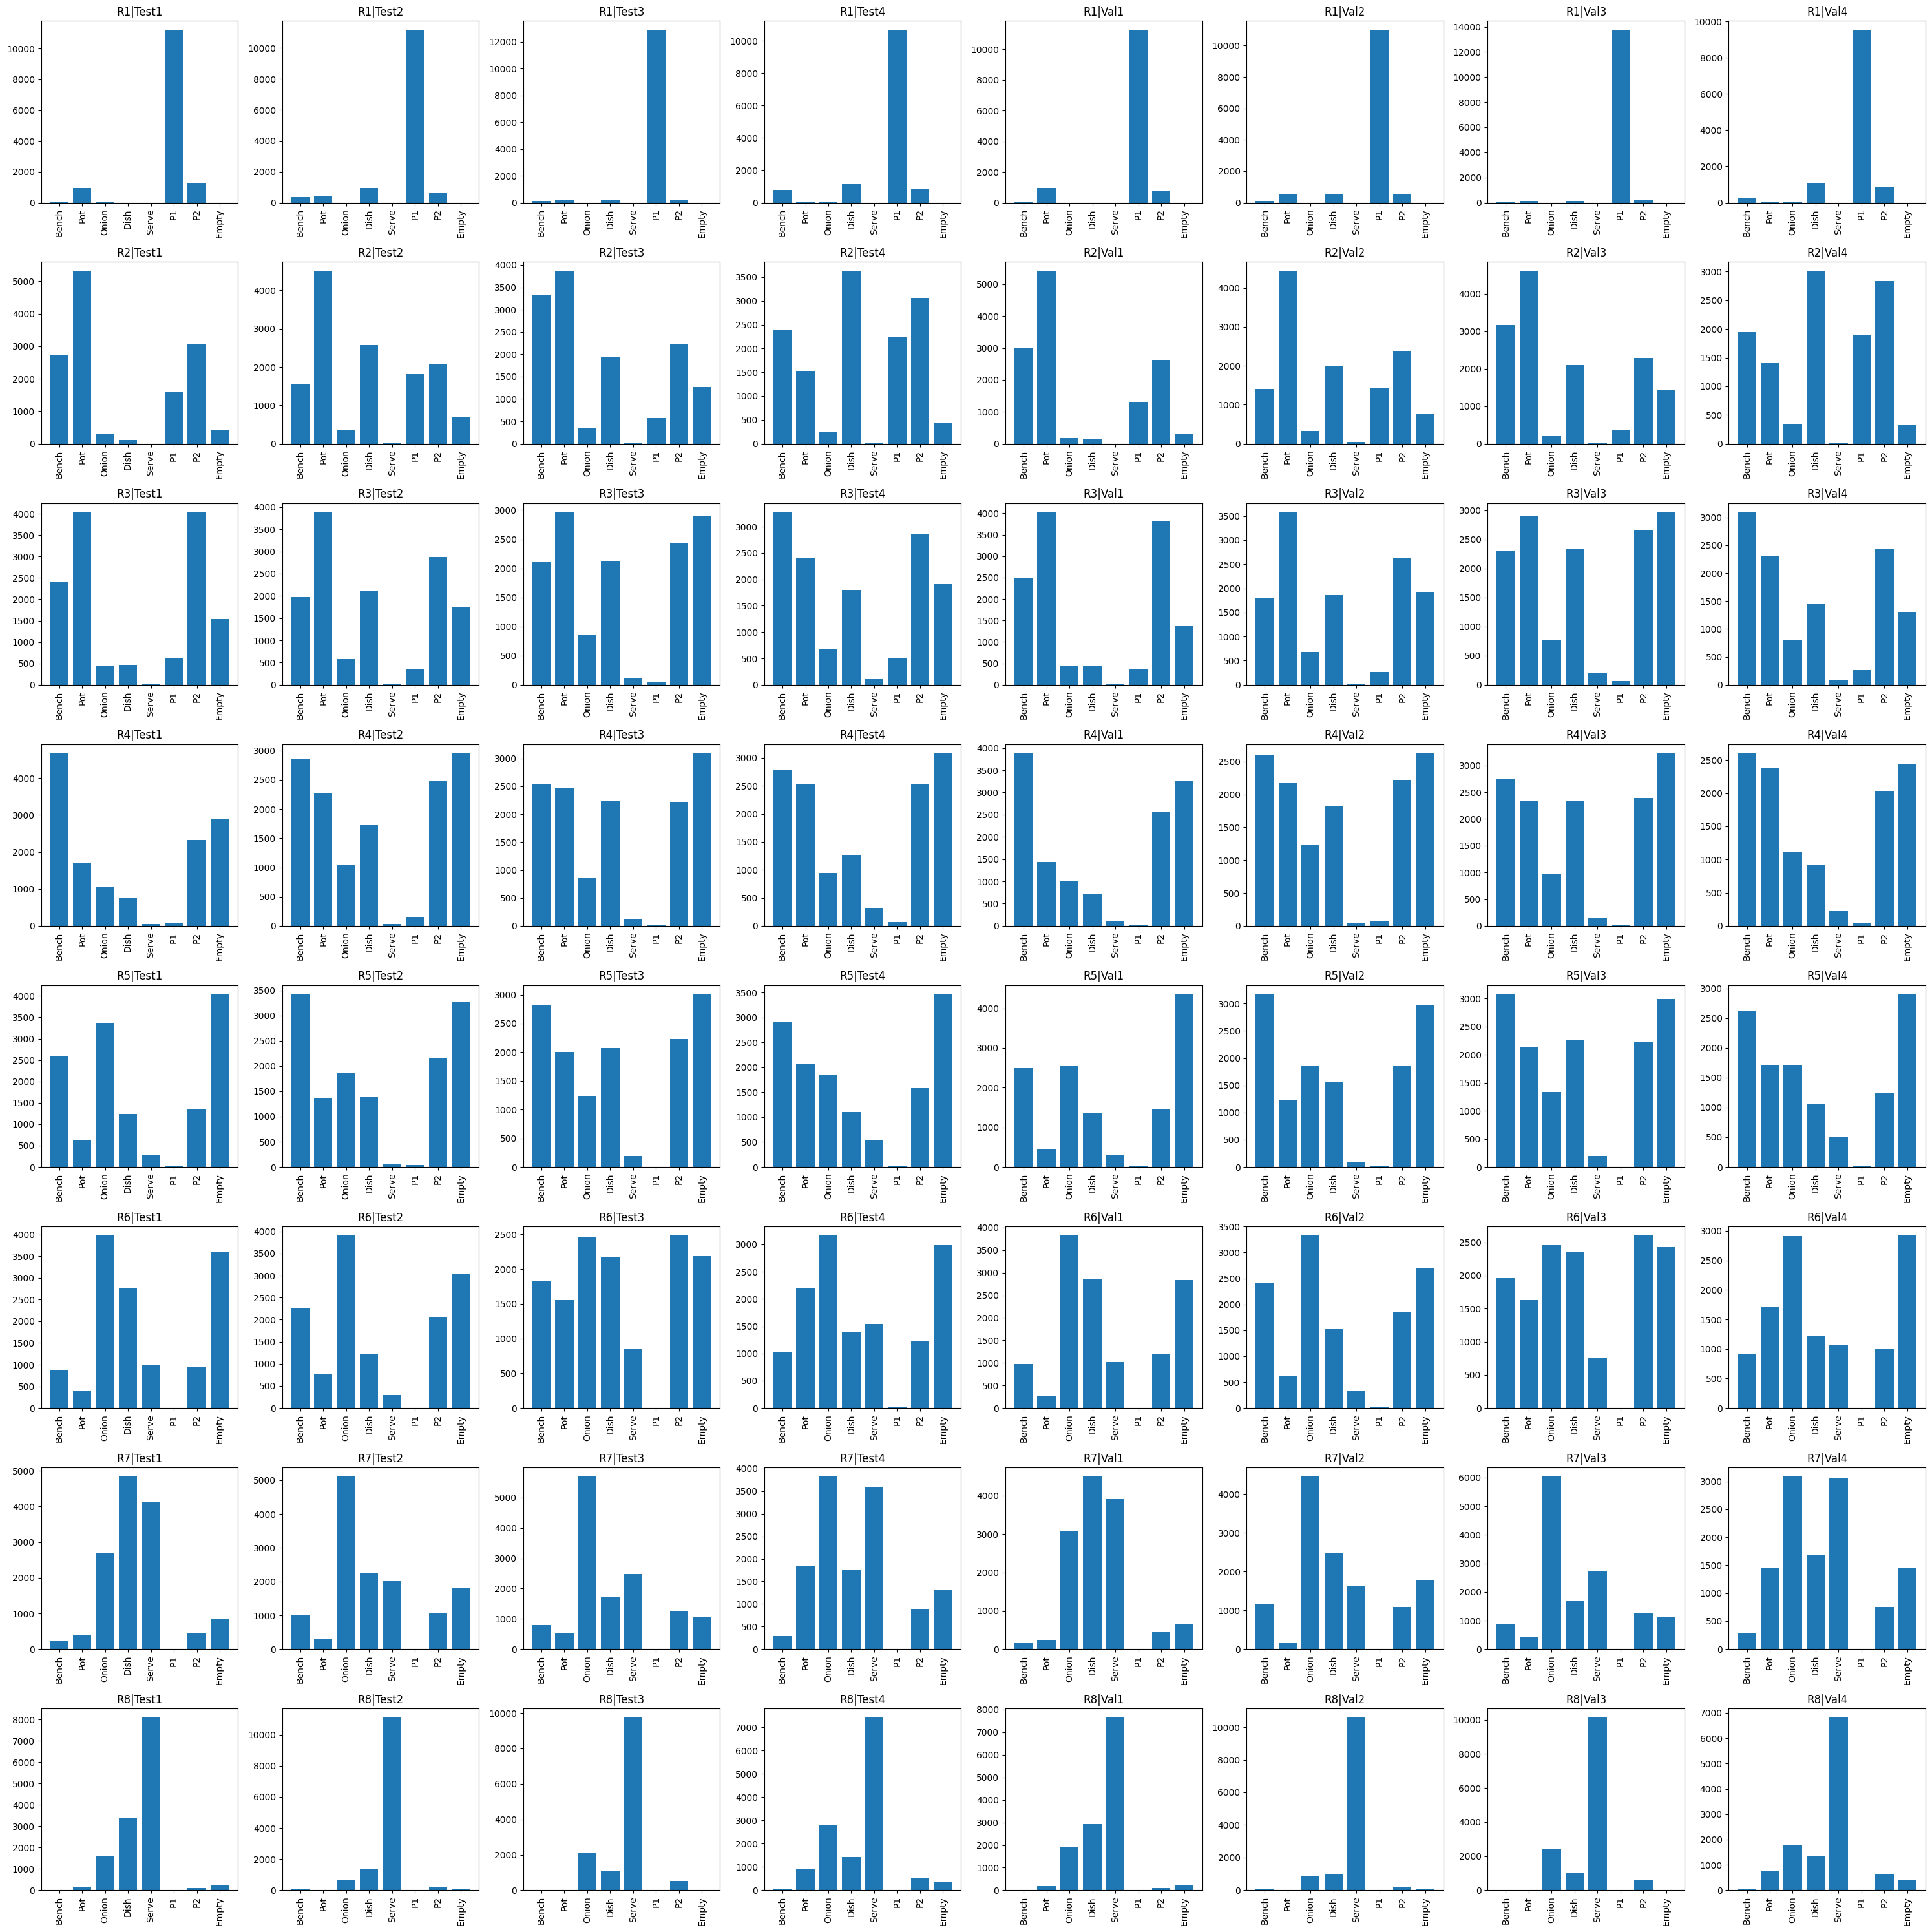

In [14]:
#No duplicate rank graphs
# 0 - Bench (X) 0/1
# 1 - Pot 0/1
# 2 - Onion Source 0/1
# 3 - Dish Source 0/1
# 4 - Serving 0/1
# 5 - Player 1
# 6 - Player 2
# 7 - None/Empty space

crossval_idx_list=[1,2,3,4]
plt.rcParams["figure.figsize"] = (30, 30)
#Test set stats
for crossval_idx in crossval_idx_list:
    cnn2_square_stats = np.load(f"./results/v2_{crossval_idx}/square_stats.npy")

    ss2_arr = np.load(f"./results/v2_{crossval_idx}/ranks.npy")

    #Reformat data for schluze application
    chars = 'XPODS12E'
    idx_dict = {chars[i]: i for i in range(len(chars))}
    ss2_arr_order = np.zeros(ss2_arr.shape)
    for i in range(len(ss2_arr)):
        for j in range(len(ss2_arr[i])):
            ss2_arr_order[i][idx_dict[ss2_arr[i][j]]] = len(ss2_arr[i]) - j - 1

    cnn_ss_no_dupes = np.zeros([8,8],dtype="int64")
    for ss2 in ss2_arr_order:
        for i in range(len(ss2)):
            ranking = int(ss2[i])
            cnn_ss_no_dupes[7-ranking,i]+=1
    # Plot
    num=8
    for i in range(num):
        plt.subplot(num,len(crossval_idx_list)*2,i*len(crossval_idx_list)*2+crossval_idx)
        plt.bar(range(8),cnn_ss_no_dupes[i])
        plt.title(f"R{i+1}|Test{crossval_idx}")
        plt.xticks(ticks = range(8),labels=tile_label,rotation="vertical");
        plt.tight_layout();



#Val set stats
for crossval_idx in crossval_idx_list:
    cnn2_square_stats = np.load(f"./results/v2_{crossval_idx}/square_stats_val.npy")

    ss2_arr = np.load(f"./results/v2_{crossval_idx}/ranks_val.npy")

    #Reformat data for schluze application
    chars = 'XPODS12E'
    idx_dict = {chars[i]: i for i in range(len(chars))}
    ss2_arr_order = np.zeros(ss2_arr.shape)
    for i in range(len(ss2_arr)):
        for j in range(len(ss2_arr[i])):
            ss2_arr_order[i][idx_dict[ss2_arr[i][j]]] = len(ss2_arr[i]) - j - 1
    
    cnn_ss_no_dupes = np.zeros([8,8],dtype="int64")
    for ss2 in ss2_arr_order:
        for i in range(len(ss2)):
            ranking = int(ss2[i])
            cnn_ss_no_dupes[7-ranking,i]+=1

    # Plot
    num=8
    for i in range(num):
        plt.subplot(num,len(crossval_idx_list)*2,i*len(crossval_idx_list)*2+crossval_idx+len(crossval_idx_list))
        plt.bar(range(8),cnn_ss_no_dupes[i])
        plt.title(f"R{i+1}|Val{crossval_idx}")
        plt.xticks(ticks = range(8),labels=tile_label,rotation="vertical");
        plt.tight_layout();    
